# <span style="color:red"> Predicting House Prices Using a Histogram-Based Gradient Boosting Regressor

### <span style="color:green"> Presented By: Oluwatimileyin Victor Adedigba </span>

> ### Abstract:
This project encompasses the comprehensive process of constructing, evaluating, and deploying a machine learning model designed for the prediction of house prices. Leveraging a Jupyter notebook environment and employing a suite of Python libraries, such as pandas, scikit-learn, and matplotlib, this project encapsulates data acquisition, data preprocessing, feature engineering, model training, and model evaluation.

The focal point of this project lies within the construction of a predictive model that aims to estimate house prices. In pursuit of this objective, various phases of model development are meticulously examined and documented.

1. Model Building:

1.1 Model Training:
In this section, we delve into the intricacies of preparing the dataset, scaling and encoding features, and applying a Histogram-Based Gradient Boosting Regressor. Detailed code snippets, annotated with descriptive comments, are included to ensure the clarity of the process.

1.2 Model Evaluation:
The performance of the model is evaluated using the Root Mean Squared Logarithmic Error (RMSLE). The computed RMSLE, an important metric, is found to be 0.22, indicating the model's predictive accuracy. This metric assessment is illustrated with clarity through code and output examples.

2. Model Inference:
This section encapsulates the culmination of the project, wherein the developed model is deployed to make predictions on an external dataset. The outcomes are thoroughly assessed and reported, thereby offering insights into the model's real-world applicability.

Conclusion:
The presented Jupyter notebook project demonstrates a comprehensive pipeline for constructing, assessing, and implementing a machine learning model for house price prediction. The utilization of a Histogram-Based Gradient Boosting Regressor and the obtained RMSLE of 0.22 enriches the discourse surrounding the domain of predictive modeling. Throughout the notebook, meticulously crafted code snippets, illuminating comments, and discernible outputs facilitate a profound understanding of the entire process.

### Importing the Necessary Libraries

In [465]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

# MODEL BUILDING

#### Loading and Splitting

In [466]:
train = pd.read_csv('train.csv')

In [467]:
# Defining feature and target
X = train.drop(['SalePrice'], axis=1) #features
y = train['SalePrice'] #target

In [468]:
# Split of train data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Preprocessing and Feature Engineering

In [469]:
X_train.shape

(1168, 80)

In [470]:
X_val.shape

(292, 80)

In [471]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

##### Exploring the features most correlated with the target

In [472]:
def correlate_features(X, y):
    # creating an empty list to store the correlation coefficients
    corr_list = []

    # looping through each column in X
    for col in X.columns:
        #  checking if the column values are numeric using np.issubdtype
        if np.issubdtype(X[col].dtype, np.number):
            # What I am doing here is calculating the correlation coefficient using np.corrcoef
            corr = np.corrcoef(X[col], y)[0, 1]
            # appending the column name and the correlation coefficient to the list
            corr_list.append((col, corr))
        else:
            # What I am doing here is skipping the column and printing a message
            print(f"{col} is not numeric, so no correlation is performed")

    # converting the list into a dataframe using pd.DataFrame()
    global corr_df
    corr_df = pd.DataFrame(corr_list, columns=['Feature', 'Correlation'])

    # sorting the dataframe by the correlation coefficient in descending order using sort_values()
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)

    # returning the dataframe
    return corr_df

correlate_features(X_train, y_train)


MSZoning is not numeric, so no correlation is performed
Street is not numeric, so no correlation is performed
Alley is not numeric, so no correlation is performed
LotShape is not numeric, so no correlation is performed
LandContour is not numeric, so no correlation is performed
Utilities is not numeric, so no correlation is performed
LotConfig is not numeric, so no correlation is performed
LandSlope is not numeric, so no correlation is performed
Neighborhood is not numeric, so no correlation is performed
Condition1 is not numeric, so no correlation is performed
Condition2 is not numeric, so no correlation is performed
BldgType is not numeric, so no correlation is performed
HouseStyle is not numeric, so no correlation is performed
RoofStyle is not numeric, so no correlation is performed
RoofMatl is not numeric, so no correlation is performed
Exterior1st is not numeric, so no correlation is performed
Exterior2nd is not numeric, so no correlation is performed
MasVnrType is not numeric, so 

Feature  Correlation
4     OverallQual     0.785555
16      GrLivArea     0.695652
26     GarageCars     0.640991
27     GarageArea     0.624139
12    TotalBsmtSF     0.597766
13       1stFlrSF     0.587883
19       FullBath     0.552546
23   TotRmsAbvGrd     0.520388
6       YearBuilt     0.516501
7    YearRemodAdd     0.508593
24     Fireplaces     0.457549
9      BsmtFinSF1     0.359460
28     WoodDeckSF     0.329843
14       2ndFlrSF     0.314030
29    OpenPorchSF     0.299969
20       HalfBath     0.280481
3         LotArea     0.266204
17   BsmtFullBath     0.226346
11      BsmtUnfSF     0.222487
21   BedroomAbvGr     0.156211
32    ScreenPorch     0.119172
33       PoolArea     0.115630
31      3SsnPorch     0.051532
35         MoSold     0.041890
10     BsmtFinSF2    -0.005731
36         YrSold    -0.009099
15   LowQualFinSF    -0.011189
0              Id    -0.019643
34        MiscVal    -0.020179
18   BsmtHalfBath    -0.048346
5     OverallCond    -0.074391
1      MSSubClass    -0.088081
22   KitchenAbvGr    -0.142785
30  EnclosedPorch    -0.149532
2     LotFrontage          NaN
8      MasVnrArea          NaN
25    GarageYrBlt          NaN

In [473]:
numerical_data = corr_df.iloc[:, 0].astype(str).tolist()
bad_features = ['LotFrontage', 'MasVntArea', 'GarageYrBlt']

numerical_data = [i for i in numerical_data if i not in bad_features]


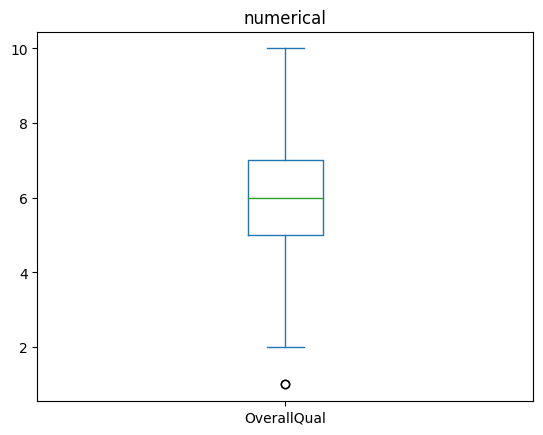

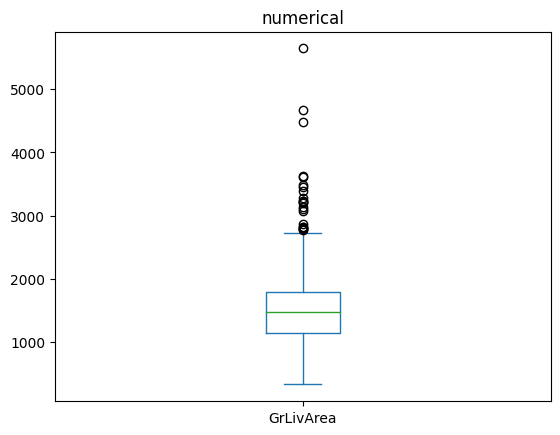

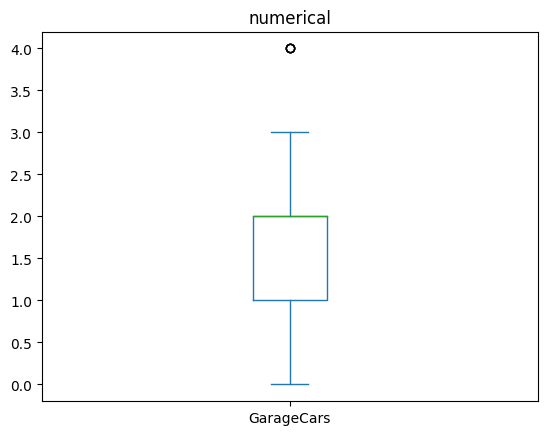

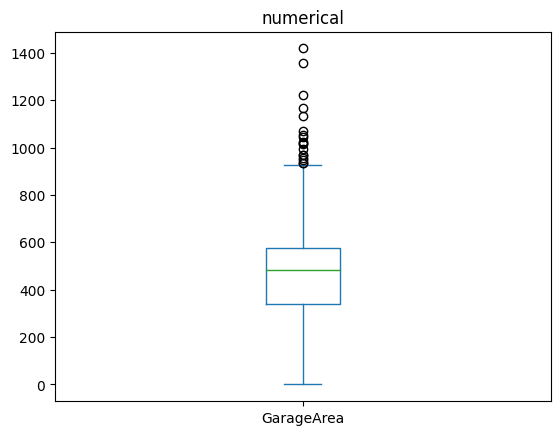

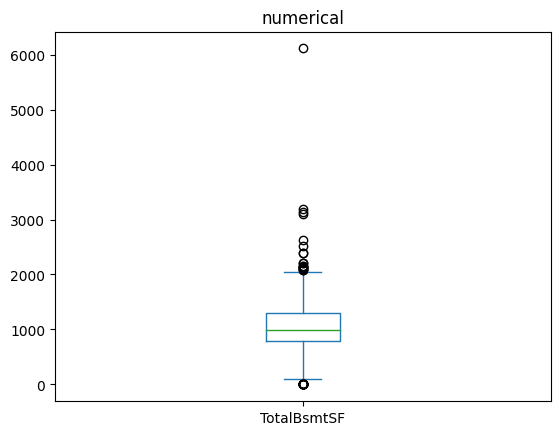

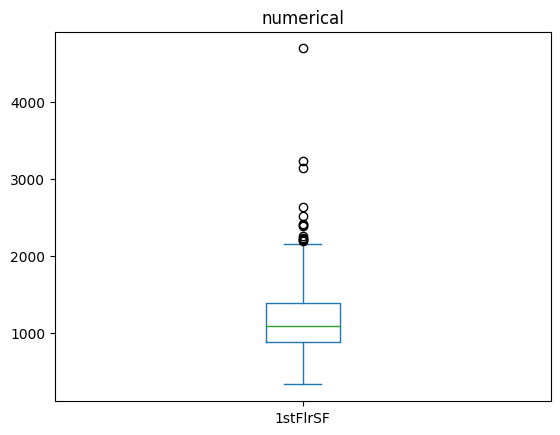

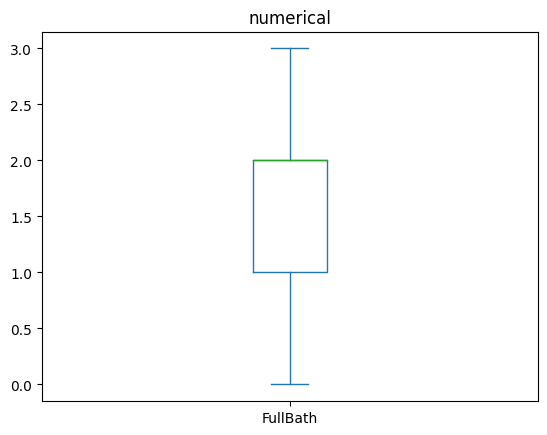

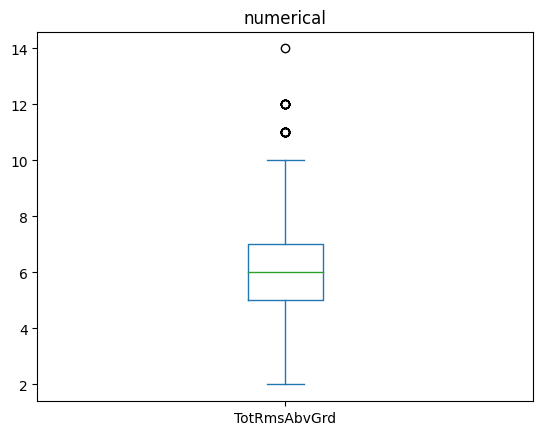

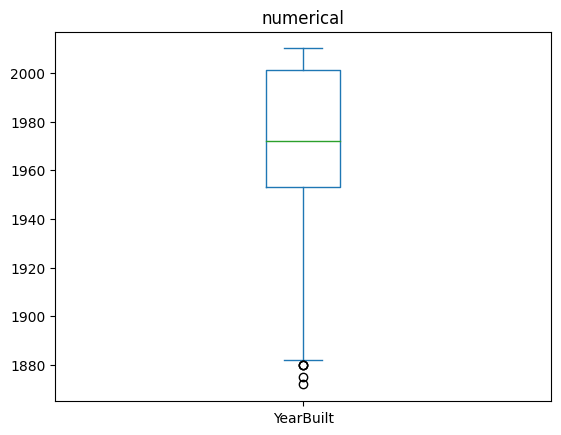

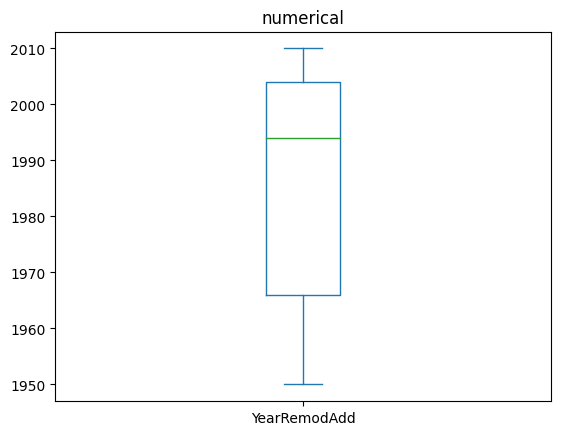

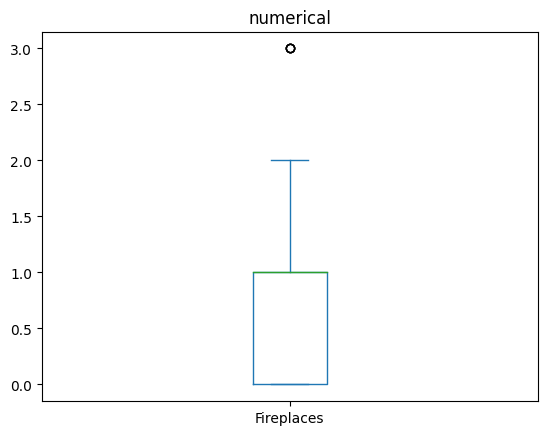

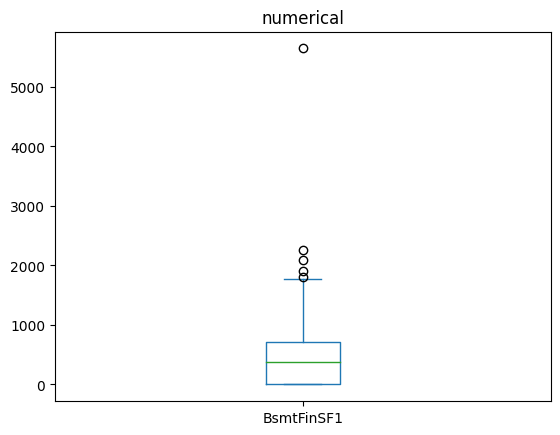

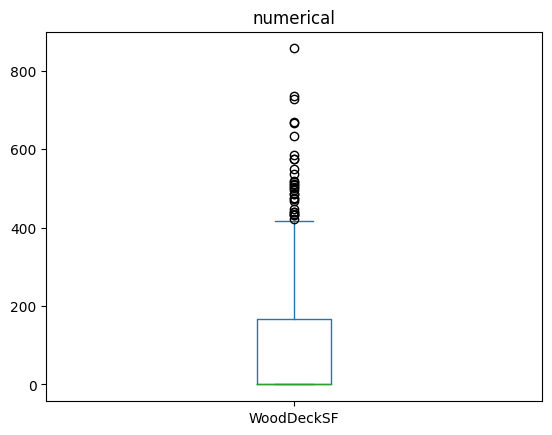

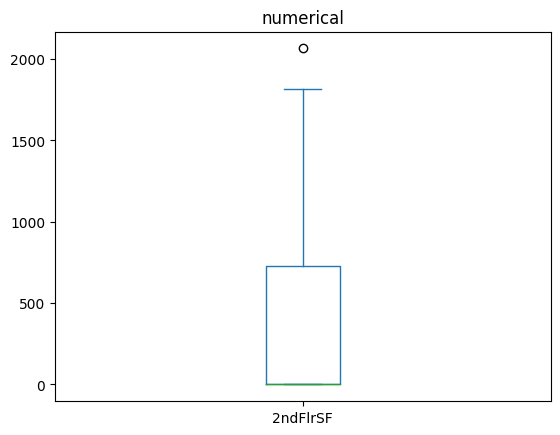

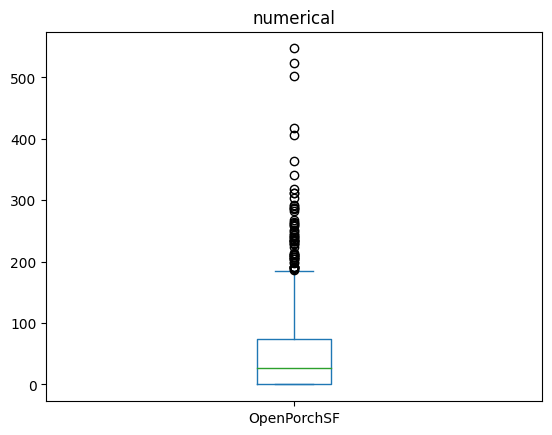

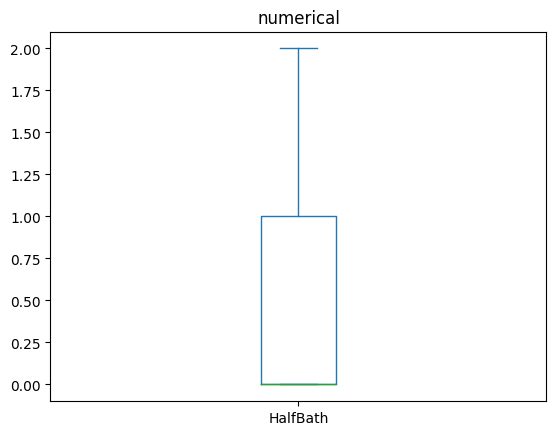

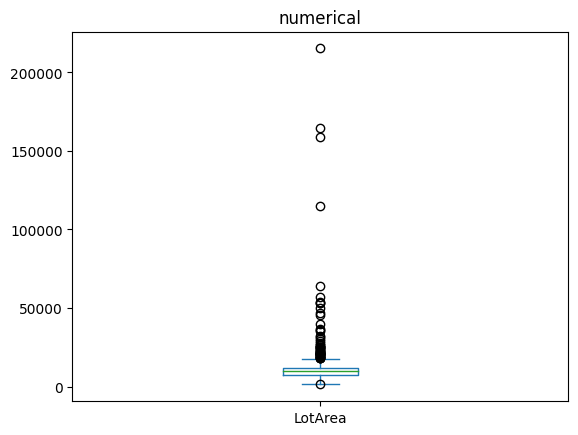

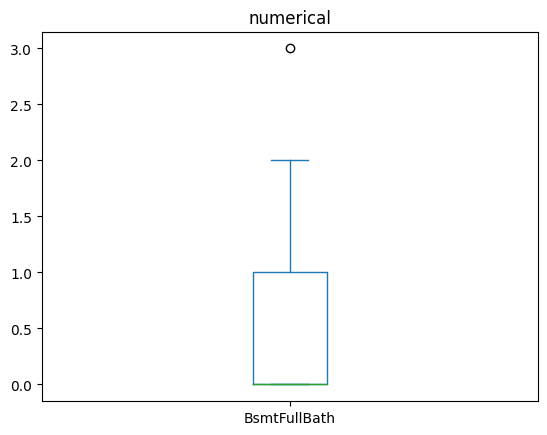

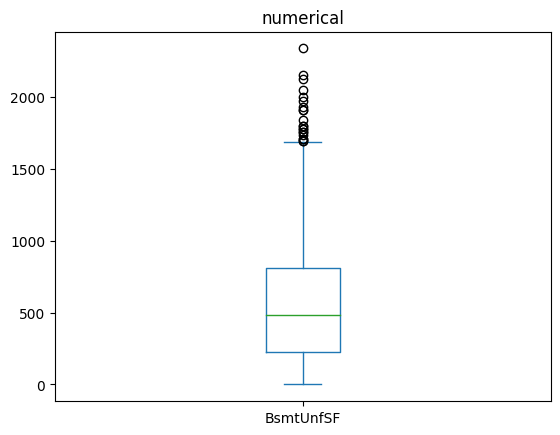

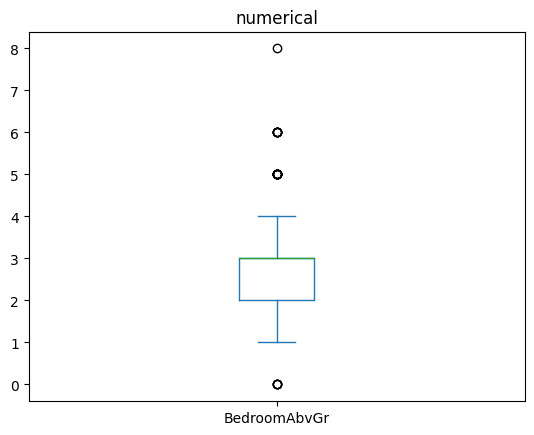

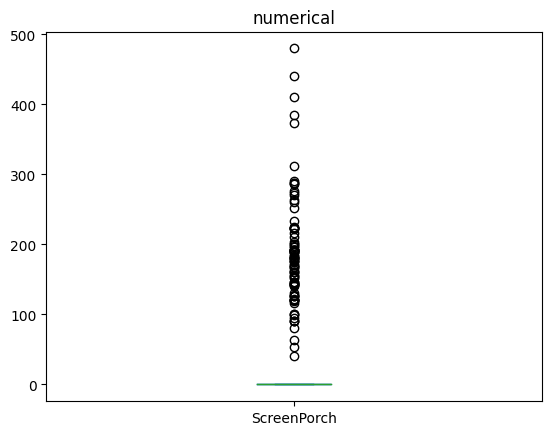

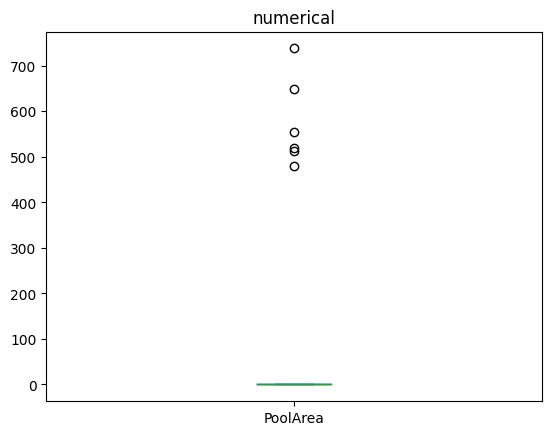

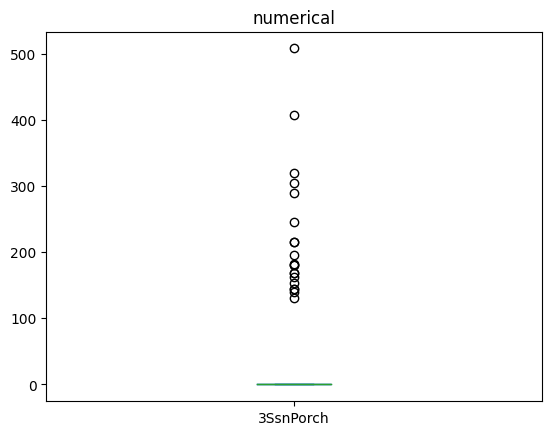

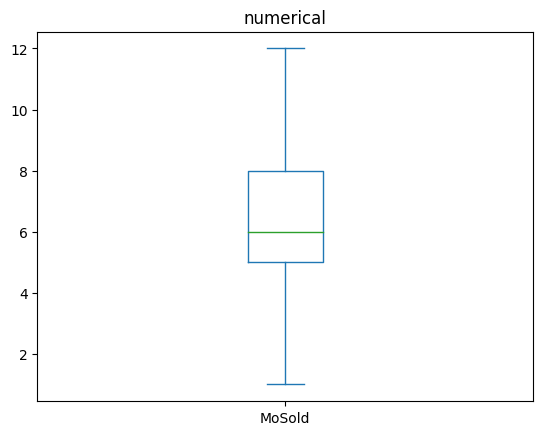

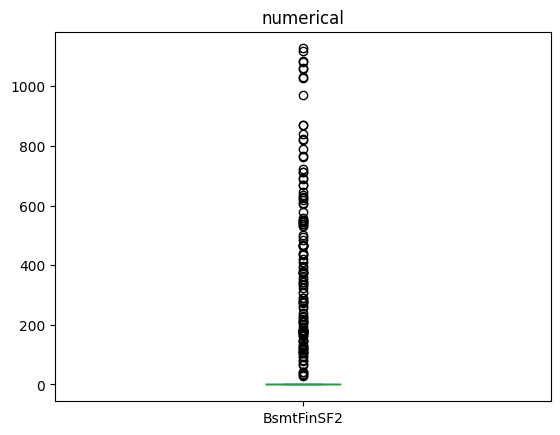

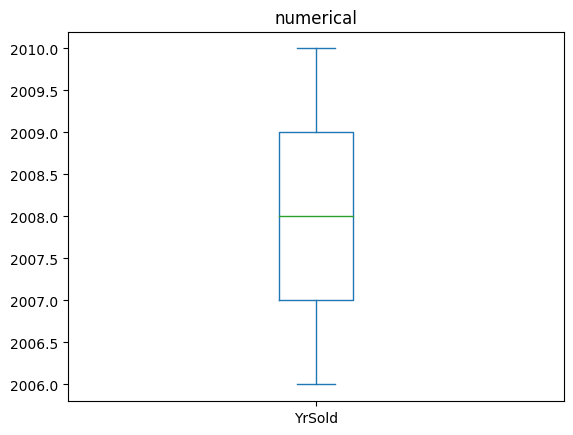

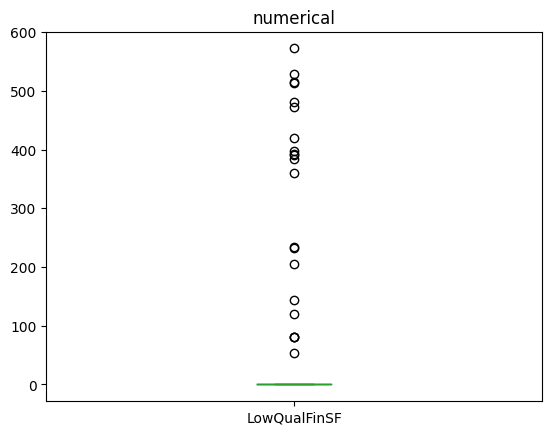

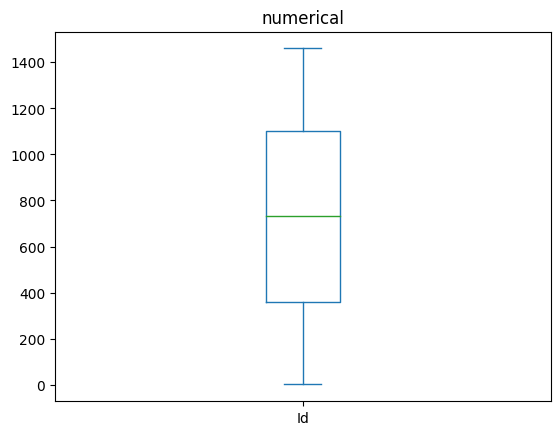

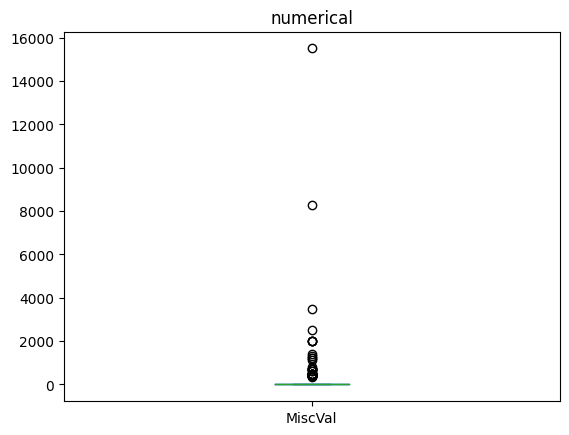

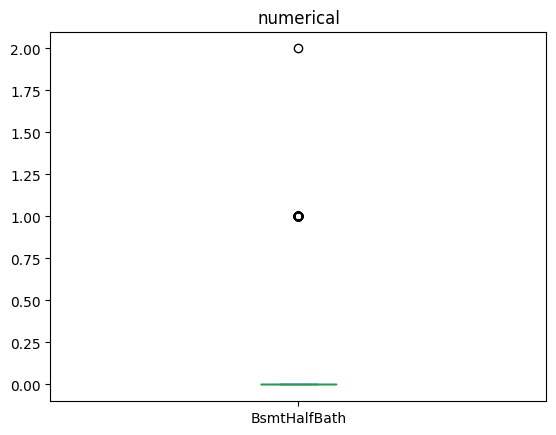

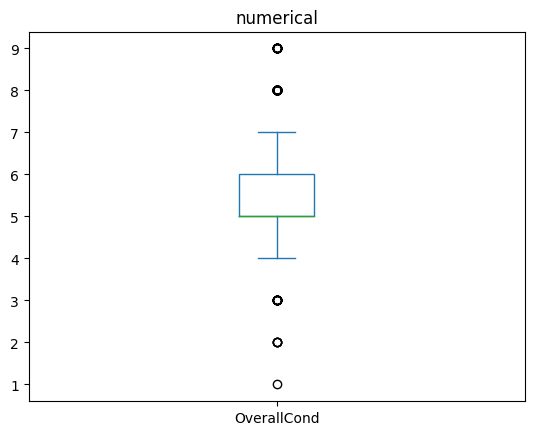

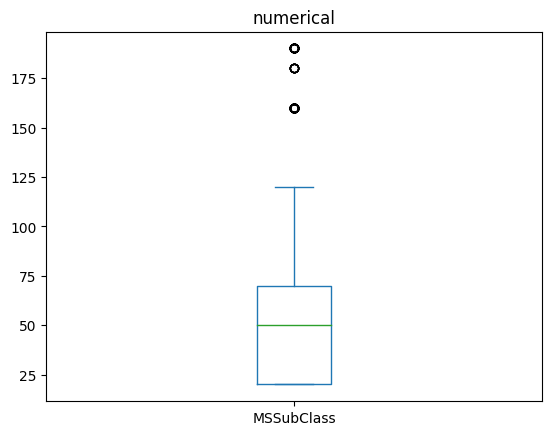

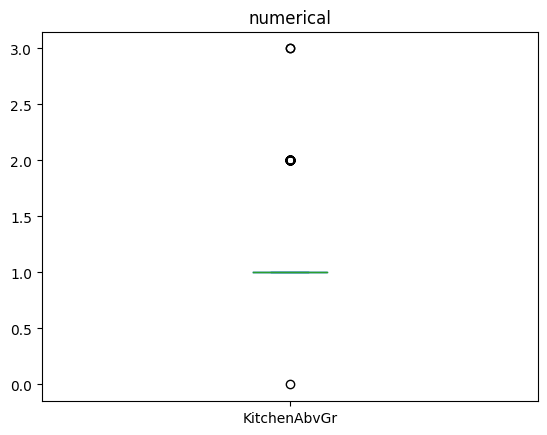

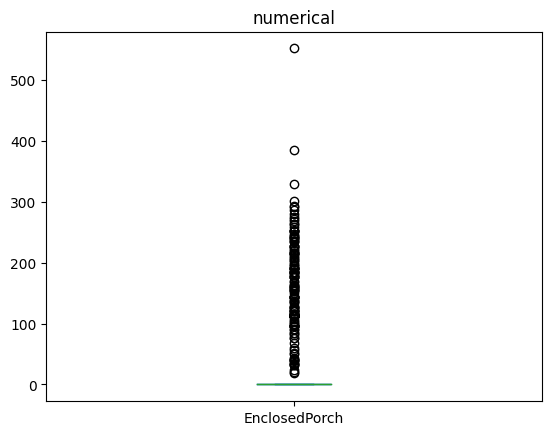

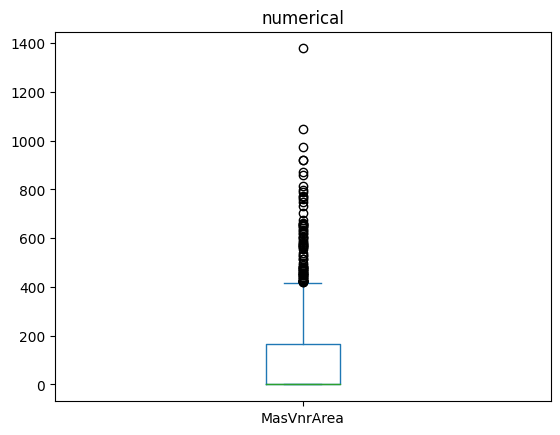

In [474]:
# The distribution of the numerical_features
for i in numerical_data:
    plt.figure()
    X_train[i].plot(kind='box')
    plt.title('numerical')
    plt.show()

#### After seeing the distribution of numerical features, next is feature engineering

In [475]:
#Train data
X_train = X_train[['Id', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BedroomAbvGr',
                 'KitchenAbvGr', 'GarageArea',
                 '1stFlrSF', 'MSZoning', 'Heating']]


In [476]:
# identifying and splitting features into continuous and categorical
numeric_features = ['Id', 'LotArea', 'YearBuilt',
                 'BsmtFinSF1', 'BedroomAbvGr',
                    'KitchenAbvGr', 'GarageArea','1stFlrSF']
categorical_features = ['MSZoning', 'Heating']

In [477]:
# To scale numerical features
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numeric_features])

# Transform the training data
X_train[numeric_features] = scaler.transform(X_train[numeric_features])



In [478]:
X_train.shape


(1168, 10)

In [479]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the training data
encoder.fit(X_train[categorical_features])

# Transform the training data
X_train_encoded = encoder.transform(X_train[categorical_features])

# Create encoded dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))

# Reset the index of X_train
X_train.reset_index(drop=True, inplace=True)

# Reset the index of X_train_encoded_df
X_train_encoded_df.reset_index(drop=True, inplace=True)

# concatenate the transformed data with your original DataFrame
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

# Drop the original categorical columns
X_train.drop(categorical_features, axis=1, inplace=True)

In [480]:
X_train.shape

(1168, 19)

## Model Training

In [481]:
hgb_regressor = HistGradientBoostingRegressor()

model = hgb_regressor.fit(X_train, y_train)


## Model Evaluation

In [482]:
#Train data
X_val = X_val[['Id', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BedroomAbvGr',
                 'KitchenAbvGr', 'GarageArea',
                 '1stFlrSF', 'MSZoning', 'Heating']]

In [483]:
# To scale numerical features
# Fit the scaler on the validation data
scaler.fit(X_val[numeric_features])

# Transform the validation data
X_val[numeric_features] = scaler.transform(X_val[numeric_features])


<ipython-input-483-fe0b9ccf02d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_features] = scaler.transform(X_val[numeric_features])


In [484]:
X_val.shape

(292, 10)

In [485]:
# no need to fit  encoder on train since we already fit it on train, else random seed
#  distribution issues may arise
# Transform the validation data
X_val_encoded = encoder.transform(X_val[categorical_features])

# Create encoded dataframe
X_val_encoded_df = pd.DataFrame(X_val_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))

# Reset the index of X_val
X_val.reset_index(drop=True, inplace=True)

# Reset the index of X_val_encoded_df
X_val_encoded_df.reset_index(drop=True, inplace=True)

# concatenate the transformed data with your original DataFrame
X_val = pd.concat([X_val, X_val_encoded_df], axis=1)

# Drop the original categorical columns
X_val.drop(categorical_features, axis=1, inplace=True)

In [486]:
X_val.shape

(292, 19)

To Predict

In [487]:
# Make predictions on the test set
y_pred = model.predict(X_val)


In [488]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
    return round(rmsle, precision)

In [489]:
compute_rmsle(y_val, y_pred)

0.22

# MODEL INFERENCE

### Loading Data

In [490]:
test = pd.read_csv('test.csv')

### Preprocessing and Feature Engineering

In [491]:
test = test[['Id', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'BedroomAbvGr',
                 'KitchenAbvGr', 'GarageArea',
                 '1stFlrSF', 'MSZoning', 'Heating']]


In [500]:
test = test.dropna()

In [502]:
test.shape

(1453, 10)

In [503]:
# Fit the scaler on the training data
scaler.fit(test[numeric_features])

# Transform the training data
test[numeric_features] = scaler.transform(test[numeric_features])

In [505]:
# Encoding test categorical features

test_encoded = encoder.transform(test[categorical_features])

# Create encoded dataframe
test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))

# Reset the index of test
test.reset_index(drop=True, inplace=True)

# Reset the index of test_encoded_df
test_encoded_df.reset_index(drop=True, inplace=True)

# concatenate the transformed data with your original DataFrame
test = pd.concat([test, test_encoded_df], axis=1)

# Drop the original categorical columns
test.drop(categorical_features, axis=1, inplace=True)

In [506]:
test.shape

(1453, 19)

In [507]:
predicted = model.predict(test)

In [510]:
pd.DataFrame(predicted)

0
0     155650.107493
1     187554.510306
2     216914.169418
3     198240.848986
4     192345.559351
...             ...
1448   87067.932673
1449  107647.429926
1450  241216.151716
1451  155136.173422
1452  231392.031331

[1453 rows x 1 columns]